In [3]:
print("test")

test


In [152]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly
%pip install geodatasets 
%pip install folium 
%pip install dash
%pip install --upgrade nbformat
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.




Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET
import math
import folium



# API Number of motor vehicles 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [6]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [7]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)
print("test")




{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [8]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [9]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

By retrieving this info, we do not need to think about how to impute missing values (because there are no NaN values)

In [118]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [119]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

Just to be sure, we used the isnull() function from pandas to again check if there are any missing values. According to this function we can conclude there are no NaN values and therefore do not think about how to impute/handle the missing values.

#### Since we want to use this data to portray the impact of cars in specific regions (provinces) on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [120]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity.  Therefore, we used the str.startswith() pandas functions to get only the data about the Provinces (excluding the LDs).

In [121]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [ ]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']
# encode the data in order to link them to the right province (for visualization)
pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index() # group the regios together and calculate the sum from columns_vehicledb per regio
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1) #calculate for each row the sum
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding) #transform the initial station_numbers using the pvencoding by implementing the map funtion
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


In [15]:
# first sum calculates the total number of each specific vehicle typed grouped per region
# second sum aggregate the regions and show the total sum per vehicle type
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum() 
dftotal["Sum"] = dftotal.sum() #store the sum of dftotal in the "Sum" column

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


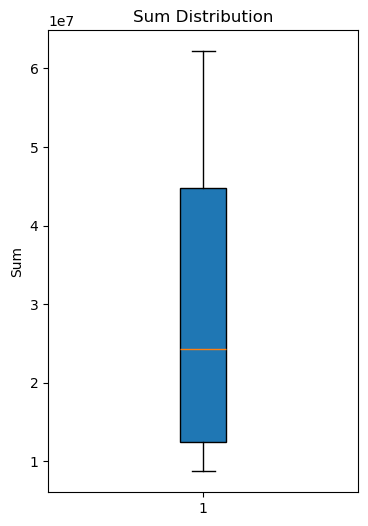

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Based on this boxplot, there are no large outliers

Now, we will visualize the total sum of cars per region to provide a generic insight for the stakeholder. Since there are no NaN values, and this visualization is created to show describe the number of cars per region, we do not have to normalize the data. This specific data will be used to detect whether there are correlations between the measured PM2.5, PM10 and NO2, and the total numbers of cars per region.

In [18]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### However, for the predictive part it is important to standardize numerical data below, so that this data could be us to train and test the datasets and create samples that well represent the data. (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization



In [19]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

# API Luchtmeetnet NO2

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [20]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [21]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [22]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



This api contains the following data:
* forumla - categorical
* station_number - categorical
* timestamp_measured - datetime
* value - continous

In [23]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10550  2025-10-14T07:00:00+00:00  39.08
1     NO2        NL10444  2025-10-14T07:00:00+00:00   9.78
2     NO2        NL10442  2025-10-14T07:00:00+00:00  24.78
3     NO2        NL01485  2025-10-14T07:00:00+00:00  44.10
4     NO2        NL01494  2025-10-14T07:00:00+00:00  38.90
5     NO2        NL10237  2025-10-14T07:00:00+00:00  33.69
6     NO2        NL10818  2025-10-14T07:00:00+00:00   6.71
7     NO2        NL10136  2025-10-14T07:00:00+00:00  18.74
8     NO2        NL10742  2025-10-14T07:00:00+00:00  41.24
9     NO2        NL10107  2025-10-14T07:00:00+00:00  21.77


According to the boxplot, we can conclude that their are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possibel decisions the stakeholder should take

In [24]:
pprint(dfposts_NO2['value'] <= 0)
pprint(len(dfposts_NO2['value'] >= 0))

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: value, Length: 1000, dtype: bool
1000


Since the data is real-time obtained from the api, meaning it changes the measure values every hour, it is important to determine as data analysts how we want to handle the negative values. We choose to ignore them so that the negative values could not influence how the data is perceived. 

In [ ]:
import numpy as np


dfposts_NO2_clean= dfposts_NO2.copy()
dfposts_NO2_clean['value']= dfposts_NO2_clean['value'].mask(dfposts_NO2_clean['value'] < 0, np.nan) #replace every value below zero as NaN
print((dfposts_NO2_clean['value'] < 0).sum())


0


In [26]:
dfposts_NO2_raw = dfposts_NO2.copy()

In [27]:
meanlocation = dfposts_NO2_raw.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)

   station_number      value
0         NL01485  28.446154
1         NL01487  15.346154
2         NL01488  15.230769
3         NL01489  14.366667
4         NL01491  20.966667
..            ...        ...
75        NL49704  17.746154
76        NL50002  12.666667
77        NL50003  12.818182
78        NL50010  12.416667
79        NL54004  21.980000

[80 rows x 2 columns]


In [28]:
meanlocation_clean = dfposts_NO2_clean.groupby('station_number')['value'].mean().reset_index()
print(meanlocation_clean)

   station_number      value
0         NL01485  28.446154
1         NL01487  15.346154
2         NL01488  15.230769
3         NL01489  14.366667
4         NL01491  20.966667
..            ...        ...
75        NL49704  17.746154
76        NL50002  12.666667
77        NL50003  12.818182
78        NL50010  12.416667
79        NL54004  21.980000

[80 rows x 2 columns]


In [29]:
# create a bar chart representing the mean from every location alongside their measured value (raw data)
bar = px.bar(meanlocation, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

# create a bar chart representing the mean from every location alongside their measured value (clean data)
bar_NO2_clean = px.bar(meanlocation_clean, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar_NO2_clean.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_NO2_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_NO2_clean.show()

To keep an eye of the data granularity (the abstraction level of our data and what we aim to visualize) we choose to encode every station manually using the following to websites:
* 

In [30]:
NO2_pvencoding={'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL10107': 'Groningen',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49021': 'Noord-Holland',
                  'NL10938': 'Zuid-Holland',
                  'NL49019': 'Noord-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10301': 'Groningen',
                  'NL10937': 'Groningen',
                  'NL49002': 'Noord-Holland',
                  'NL50010': 'Limburg',
                  'NL50002': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL49022': 'Noord-Holland',
                  'NL10237': 'Noord-Brabant'}

dfposts_NO2['RegioS']  = dfposts_NO2['station_number'].map(NO2_pvencoding)
meanprovince = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince)


           RegioS      value
0         Drenthe   2.337692
1       Flevoland   2.532692
2       Friesland   1.838400
3      Gelderland  17.488462
4       Groningen  17.923462
5         Limburg  11.749059
6   Noord-Brabant  15.436596
7   Noord-Holland  18.667704
8      Overijssel   4.118000
9         Utrecht  13.797846
10        Zeeland  18.382338
11   Zuid-Holland  18.834803


In [31]:
print(meanprovince)

           RegioS      value
0         Drenthe   2.337692
1       Flevoland   2.532692
2       Friesland   1.838400
3      Gelderland  17.488462
4       Groningen  17.923462
5         Limburg  11.749059
6   Noord-Brabant  15.436596
7   Noord-Holland  18.667704
8      Overijssel   4.118000
9         Utrecht  13.797846
10        Zeeland  18.382338
11   Zuid-Holland  18.834803


In [32]:
dfposts_NO2_clean['RegioS']  = dfposts_NO2_clean['station_number'].map(NO2_pvencoding)
meanprovince_clean = dfposts_NO2_clean.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_clean)

           RegioS      value
0         Drenthe   2.337692
1       Flevoland   2.532692
2       Friesland   1.838400
3      Gelderland  17.488462
4       Groningen  17.923462
5         Limburg  11.749059
6   Noord-Brabant  15.436596
7   Noord-Holland  18.667704
8      Overijssel   4.118000
9         Utrecht  13.797846
10        Zeeland  18.382338
11   Zuid-Holland  18.834803


In [33]:
print(NO2_pvencoding)
print(dfposts_NO2['RegioS'])
dfposts_NO2.info()

{'NL49703': 'Noord-Holland', 'NL49553': 'Noord-Holland', 'NL01493': 'Zuid-Holland', 'NL10404': 'Zuid-Holland', 'NL10318': 'Zeeland', 'NL01912': 'Zeeland', 'NL10742': 'Groningen', 'NL10538': 'Noord-Holland', 'NL01496': 'Zuid-Holland', 'NL01495': 'Zuid-Holland', 'NL49007': 'Noord-Holland', 'NL10636': 'Utrecht', 'NL49564': 'Noord-Holland', 'NL10818': 'Overijssel', 'NL10550': 'Noord-Holland', 'NL49546': 'Noord-Holland', 'NL10136': 'Limburg', 'NL10235': 'Noord-Brabant', 'NL01913': 'Zeeland', 'NL10918': 'Friesland', 'NL01487': 'Zuid-Holland', 'NL10639': 'Utrecht', 'NL01497': 'Zeeland', 'NL10644': 'Utrecht', 'NL10633': 'Utrecht', 'NL10741': 'Gelderland', 'NL10437': 'Zeeland', 'NL10247': 'Noord-Brabant', 'NL10445': 'Zeeland', 'NL10934': 'Friesland', 'NL01494': 'Zuid-Holland', 'NL10449': 'Zuid-Holland', 'NL49017': 'Noord-Holland', 'NL49551': 'Noord-Holland', 'NL10617': 'Flevoland', 'NL10442': 'Zuid-Holland', 'NL10446': 'Zuid-Holland', 'NL49565': 'Noord-Holland', 'NL10418': 'Zuid-Holland', 'NL10

This data contains no NaN values, therefore we do not need to consider how to impute such data

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

#create bar chart of average µg/m³ per region using raw data
pv_mean = meanprovince[meanprovince['RegioS'].isin(pv)]
bar = px.bar(meanprovince, x='RegioS' , y= dfposts_NO2.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

#create bar chart of average µg/m³ per region using clean data
pv_mean_clean = meanprovince_clean[meanprovince_clean['RegioS'].isin(pv)]
bar_cleanno2 = px.bar(meanprovince_clean, x='RegioS' , y= dfposts_NO2_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar_cleanno2.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_cleanno2.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar_cleanno2.show()

In [35]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [36]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
80 station points
['NL10550' 'NL10444' 'NL10442' 'NL01485' 'NL01494' 'NL10237' 'NL10818'
 'NL10136' 'NL10742' 'NL10107' 'NL49017' 'NL10230' 'NL10318' 'NL01913'
 'NL10918' 'NL10641' 'NL10437' 'NL01487' 'NL49564' 'NL10450' 'NL49021'
 'NL49680' 'NL01488' 'NL01495' 'NL49553' 'NL10246' 'NL01491' 'NL49704'
 'NL49551' 'NL10644' 'NL10241' 'NL10741' 'NL49003' 'NL49019' 'NL10722'
 'NL49020' 'NL01493' 'NL01489' 'NL10240' 'NL49014' 'NL01497' 'NL49565'
 'NL10131' 'NL10738' 'NL49703' 'NL49022' 'NL10248' 'NL10643' 'NL49701'
 'NL10617' 'NL10807' 'NL10633' 'NL01912' 'NL49561' 'NL10404' 'NL10236'
 'NL10449' 'NL54004' 'NL10937' 'NL10247' 'NL10301' 'NL10639' 'NL10133'
 'NL10636' 'NL10446' 'NL10934' 'NL10418' 'NL49546' 'NL49002' 'NL10938'
 'NL10929' 'NL10445' 'NL49007' 'NL50010' 'NL50003' 'NL50002' 'NL10138'
 'NL01496' 'NL10235' 'NL49012']
station_number
NL10550    13
NL10444    13
NL10442    13
NL01485    13
NL10237    13
           ..
NL10138    12
NL01496    12
NL50003    11
NL10235     4
NL49012     

In [37]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value,RegioS
count,1000,1000,1000,1000.00000,1000
unique,1,80,13,NaN,12
top,NO2,NL10550,2025-10-13T20:00:00+00:00,NaN,Noord-Holland
freq,1000,13,80,NaN,257
mean,NaN,NaN,NaN,15.95935,NaN
std,NaN,NaN,NaN,11.40081,NaN
min,NaN,NaN,NaN,0.60000,NaN
25%,NaN,NaN,NaN,7.90000,NaN
50%,NaN,NaN,NaN,13.49000,NaN
75%,NaN,NaN,NaN,21.23250,NaN


According to this boxplot, their are some outliers. We choose to log transform to reduce the skewness of the dataset. 

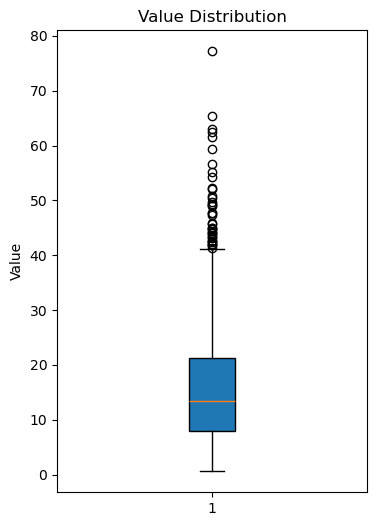

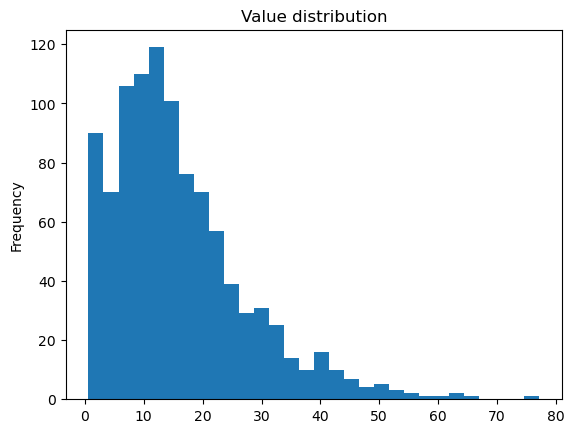

In [38]:
plt.figure(figsize=(4,6))
values = dfposts_NO2_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()



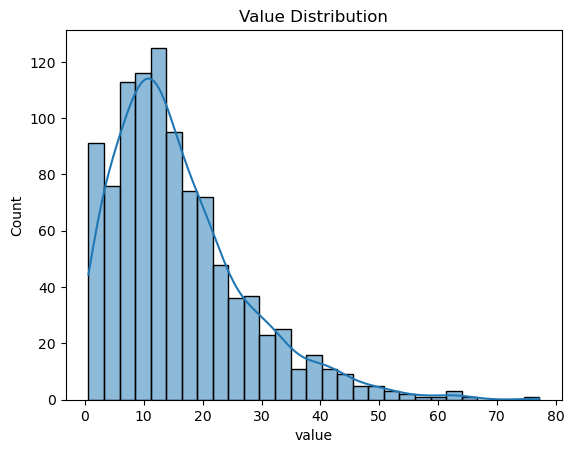

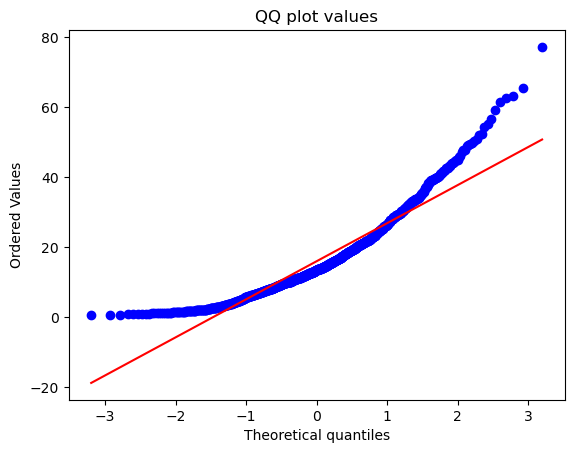

In [40]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [41]:
print(values.skew())


1.3102773967437766


In [42]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




log_x = np.log(values)
print(log_x)



0      3.665611
1      2.280339
2      3.210037
3      3.786460
4      3.660994
         ...   
995    2.503074
996    1.771557
997    1.291984
998    2.572612
999    2.954910
Name: value, Length: 1000, dtype: float64


In [43]:
log_x.skew()

np.float64(-0.840280771212483)

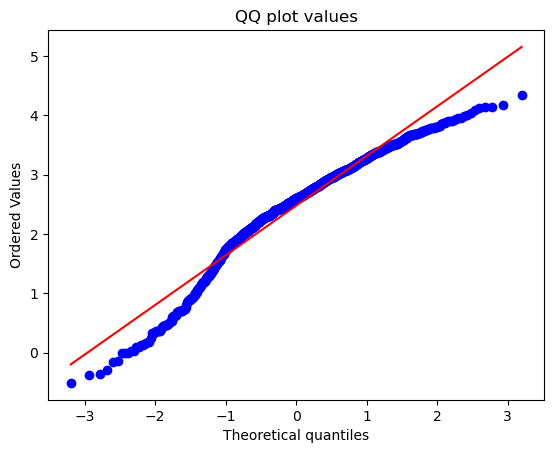

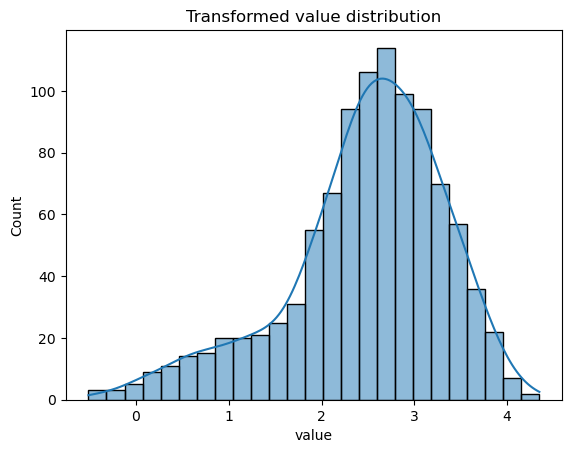

In [44]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()


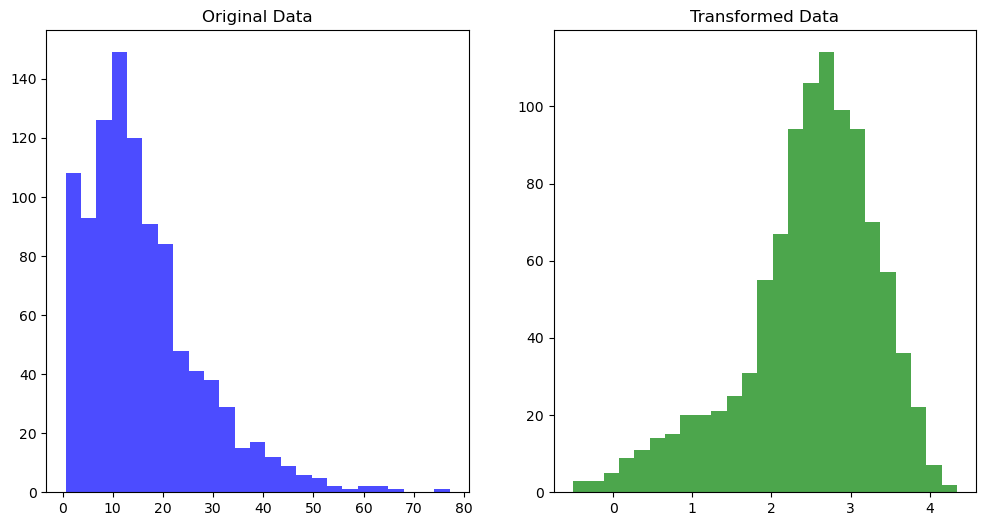

In [45]:

#distribution before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(values, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

#distribution after transformation
plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data')

plt.show()

If you compare this boxplot with the boxplot before the transformation, you can see that it handled the outliers by compressing the larger measured values (handling datapoints that could be potentially marked as outliers). However, there are some negative datapoints now.
* Kijk naar hoe je om gaat met deze data

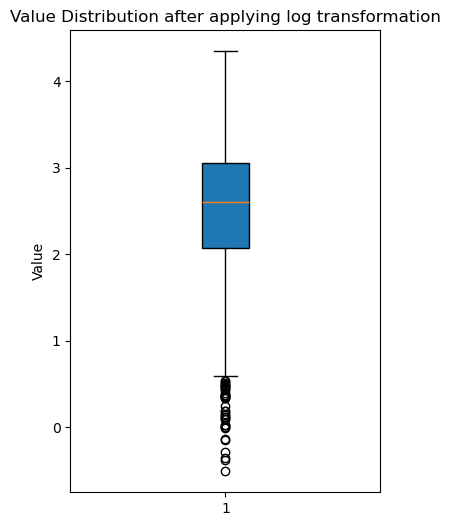

In [46]:
#boxplot after transformation
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution after applying log transformation")
plt.ylabel("Value")
plt.show()

For the predicition part, we need the log_x data to standardize this. The reason why we standardize the data is because......

In [47]:
print(meanprovince_clean)
print(dftotal)

print(meanprovince['value'].mean())


           RegioS      value
0         Drenthe   2.337692
1       Flevoland   2.532692
2       Friesland   1.838400
3      Gelderland  17.488462
4       Groningen  17.923462
5         Limburg  11.749059
6   Noord-Brabant  15.436596
7   Noord-Holland  18.667704
8      Overijssel   4.118000
9         Utrecht  13.797846
10        Zeeland  18.382338
11   Zuid-Holland  18.834803
Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoer

In [48]:

dfcorrelation = pd.merge(meanprovince, dfprovince, on='RegioS')

correlation = dfcorrelation[['value', 'Sum']].corr()
corr_matrix = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        text=correlation.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix.show()

Since the log_x values are stored as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

In [49]:
standardizeNO2 = StandardScaler().fit_transform(log_x.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

0      1.392850
1     -0.229347
2      0.859358
3      1.534368
4      1.387444
         ...   
995    0.031483
996   -0.825147
997   -1.386742
998    0.112914
999    0.560597
Length: 1000, dtype: float64


# API Luchtmeetnet PM2.5

In [50]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [51]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM25.head(10))



  formula station_number         timestamp_measured  value
0    PM25        NL10247  2025-10-14T07:00:00+00:00   2.85
1    PM25        NL10138  2025-10-14T07:00:00+00:00  13.67
2    PM25        NL10641  2025-10-14T07:00:00+00:00   6.14
3    PM25        NL10937  2025-10-14T07:00:00+00:00   1.43
4    PM25        NL10821  2025-10-14T07:00:00+00:00   7.69
5    PM25        NL01497  2025-10-14T07:00:00+00:00   0.90
6    PM25        NL01913  2025-10-14T07:00:00+00:00  13.70
7    PM25        NL49980  2025-10-14T07:00:00+00:00   3.10
8    PM25        NL10644  2025-10-14T07:00:00+00:00   8.46
9    PM25        NL10938  2025-10-14T07:00:00+00:00  -0.56


After analyzing this data, there are some negative values. In the following code, we will take a look at this negative values.

In [52]:
meanlocation_PM25 = dfposts_PM25.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25)

   station_number     value
0         NL01485  2.964706
1         NL01487  2.770588
2         NL01488  2.747059
3         NL01489  3.311765
4         NL01491  3.593750
..            ...       ...
56        NL50010  7.750000
57        NL50011  6.750000
58        NL50012  8.466667
59        NL54004  4.586667
60        NL54010  3.959412

[61 rows x 2 columns]


Note: it is important to make a copy of the data so that we can use it easily without any issues

In [55]:
dfposts_PM25_raw = dfposts_PM25.copy()

According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

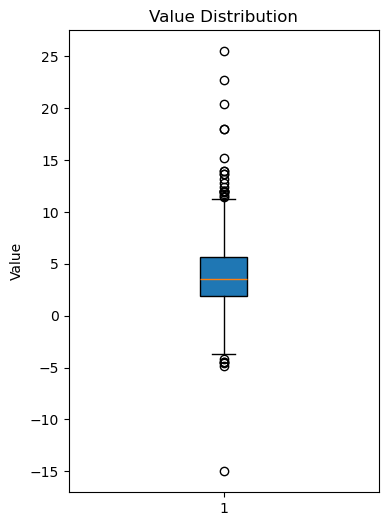

In [56]:
plt.figure(figsize=(4,6))
values_pm25 = dfposts_PM25_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [57]:
pprint((dfposts_PM25['value'] < 0).sum())
pprint((dfposts_PM25['value'] > 0).sum())

np.int64(67)
np.int64(928)


According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

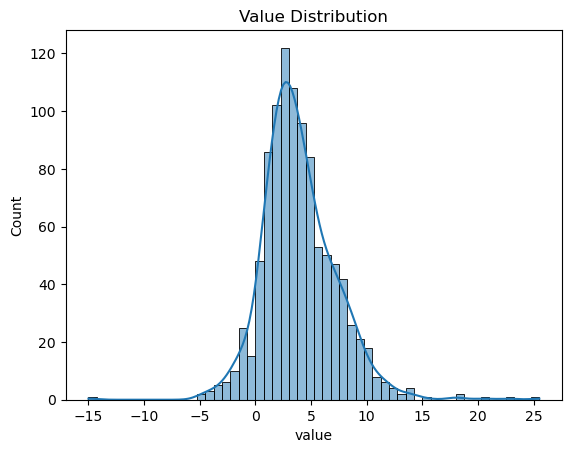

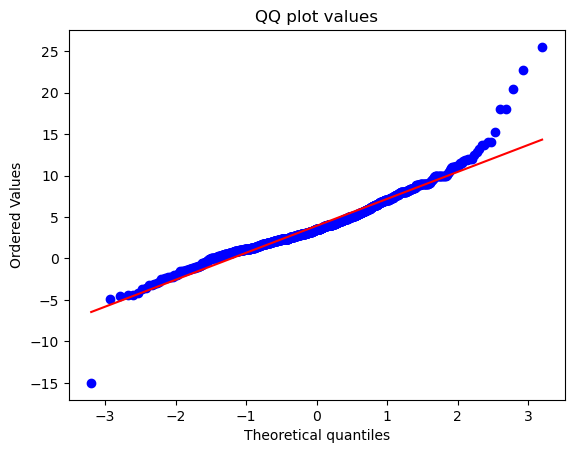

In [58]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm25, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [59]:
dfposts_PM25['value'].skew()

np.float64(0.8270573563138088)

In [60]:
c_pm25 = abs(values_pm25.min())

In [61]:
print(c_pm25)

15.0


In [62]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25 = values_pm25 + c_pm25 + 0.01 # In case cpm25 is 0 add 0.00000001
log_xpm25 = np.log(shiftpm25)  
print(log_xpm25)

0      2.882564
1      3.356200
2      3.051640
3      2.799717
4      3.122365
         ...   
995    2.803360
996    2.747912
997    2.833801
998    2.976040
999    2.791778
Name: value, Length: 1000, dtype: float64


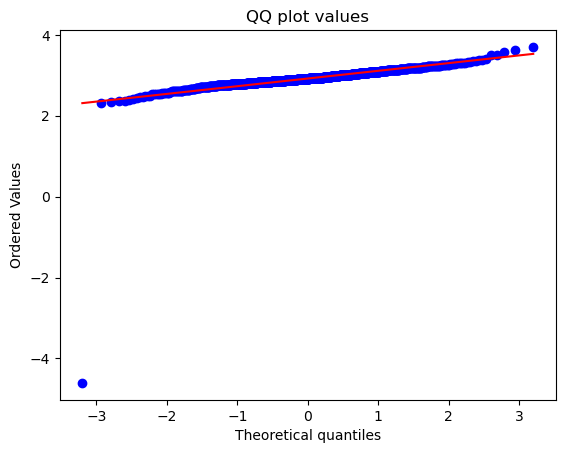

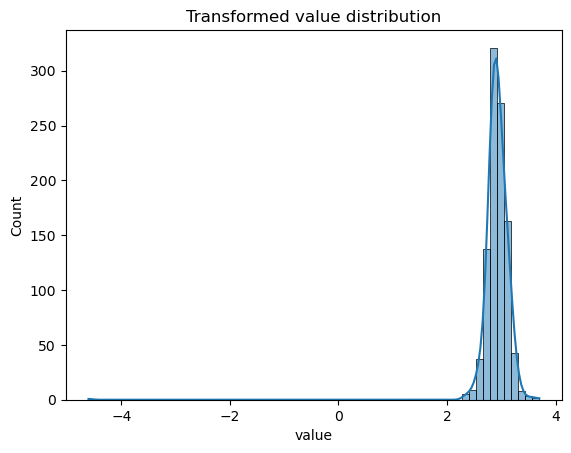

In [63]:
stats.probplot(log_xpm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm25,kde=True)
plt.title("Transformed value distribution")
plt.show()


The data will become more skewed after removing the negative values. However this step is necessary because negative values are not possible (occur probably due to calibration errors and therefore could be seen as noise). Before standardizing the data, we will first transform the data by compressing the larger values (making it more normally distributed).
- However this transformation will again lead to negative values. In this case we will apply the following formulae to tackle this issue
    - log(x) + c
        - x is in this case the values from the PM2.5 variable but the cleaned version
        - c will be in this case the absolute value of the minimum measured value from 'values_pm10_cleaned' variable.

This will only change the scale, but it will not have an impact on the overall distribution of the log transformation data.

After transforming the data, the data will become less skewed (however still slightly negatively skewed), making the data set more normally distributed.



In [64]:
log_xpm25.skew()

np.float64(-17.201650616543574)

The above value shows that the distribution is negatively skewed (raw data) after the log transformation. For the cleaned data set, we follow the exact same steps and try to compare the results with the raw data.

In [65]:
dfposts_PM25_clean= dfposts_PM25.copy()

dfposts_PM25_clean['value']= dfposts_PM25_clean['value'].mask(dfposts_PM25_clean['value'] < 0, np.nan)

print((dfposts_PM25_clean['value'] < 0).sum())


0


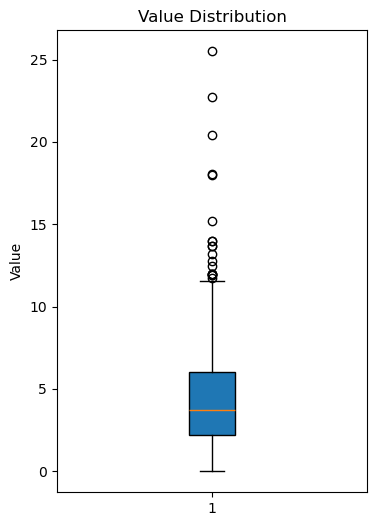

In [66]:
plt.figure(figsize=(4,6))
values_pm25_cleaned = dfposts_PM25_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

In [67]:
c_pm25_clean = abs(values_pm25_cleaned.min())

In [68]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25_cleaned = values_pm25_cleaned + c_pm25_clean + 0.01 #add 0.01 in case c_pm25_clean will be 0
log_xpm25_cleaned = np.log(shiftpm25_cleaned)  
print(log_xpm25_cleaned)

0      1.050822
1      2.615935
2      1.816452
3      0.364643
4      2.041220
         ...   
995    0.405465
996   -0.494296
997    0.698135
998    1.528228
999    0.270027
Name: value, Length: 933, dtype: float64


After the log transformation on the cleaned data set, you see that the distubition becomes less skewed compared to the log transformation on the cleaned data set. 

In [69]:
meanlocation_PM25_cleaned = dfposts_PM25_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25_cleaned)

   station_number     value
0         NL01485  2.964706
1         NL01487  2.770588
2         NL01488  2.747059
3         NL01489  3.311765
4         NL01491  3.593750
..            ...       ...
56        NL50010  7.750000
57        NL50011  6.750000
58        NL50012  8.466667
59        NL54004  4.586667
60        NL54010  3.959412

[61 rows x 2 columns]


In [70]:
# create bar with average measured pm2.5 values for each station on the raw data
bar_pm25 = px.bar(meanlocation_PM25, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 

bar_pm25.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25.show()

Based on the mean values, you can see that the negative values, which we marked as outliers, has an impact on the calculation of the means.

In [71]:
print(meanlocation_PM25['value'].mean())
print(meanlocation_PM25_cleaned['value'].mean())

3.941571480231437
4.283964497572501


In [72]:
# create bar with average measured pm2.5 values for each station on the clean data
bar_pm25_clean = px.bar(meanlocation_PM25_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25_clean.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25_clean.show()

The piece of code in the following cell will calculate the avg value (mean) of the cleaned and raw data set. It will eventually show the station numbers where the mean calculated from the raw dataset differs from the cleaned dataset. 

In [73]:
raw = meanlocation_PM25.groupby('station_number')['value'].mean()
clean = meanlocation_PM25_cleaned.groupby('station_number')['value'].mean()

differencepm25_raw = np.setdiff1d(raw, clean )
differencepm25_clean = np.setdiff1d(clean, raw )
difference_mergepm25 = meanlocation_PM25.merge(meanlocation_PM25_cleaned, on='station_number')
difference= difference_mergepm25[difference_mergepm25['value_x'] != difference_mergepm25['value_y']]
print(difference)

   station_number   value_x   value_y
12        NL10131  2.075882  4.345000
15        NL10230  0.174375  1.785000
16        NL10240  5.420588  5.900000
18        NL10247  5.104118  5.488750
22        NL10444  2.490588  3.294286
24        NL10450  2.515294  2.750625
25        NL10636  3.082353  3.362500
26        NL10641  3.934706  4.272500
27        NL10643  3.956471  5.542143
28        NL10644  4.186250  4.522667
33        NL10934  0.877059  2.356364
34        NL10937  2.026875  2.567143
35        NL10938  1.606471  3.276364
42        NL49551  4.729412  9.609091
43        NL49553  2.511765  2.675000
44        NL49556  0.964706  2.245455
45        NL49557 -0.411765  1.037500
46        NL49561  4.311765  4.587500
47        NL49570  2.275000  3.100000


Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM25 will be added to the tuple. We used the following links in order to manually link each station_numbers to its province: 
- https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 
- https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm25%7Cwind&bounds=6.90754%7C52.2298%7C6.9314%7C52.24208

In [54]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM25= dfposts_PM25['station_number'].unique()
print(uniquePM25)

intersection = np.intersect1d(uniqueNO2, uniquePM25)

print(len(intersection))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM25)
differencepm25 = np.setdiff1d(uniquePM25, uniqueNO2)
print(differencepm25, 'PM25 only')
print(differenceno2, 'NO2 only')


['NL10550' 'NL10444' 'NL10442' 'NL01485' 'NL01494' 'NL10237' 'NL10818'
 'NL10136' 'NL10742' 'NL10107' 'NL49017' 'NL10230' 'NL10318' 'NL01913'
 'NL10918' 'NL10641' 'NL10437' 'NL01487' 'NL49564' 'NL10450' 'NL49021'
 'NL49680' 'NL01488' 'NL01495' 'NL49553' 'NL10246' 'NL01491' 'NL49704'
 'NL49551' 'NL10644' 'NL10241' 'NL10741' 'NL49003' 'NL49019' 'NL10722'
 'NL49020' 'NL01493' 'NL01489' 'NL10240' 'NL49014' 'NL01497' 'NL49565'
 'NL10131' 'NL10738' 'NL49703' 'NL49022' 'NL10248' 'NL10643' 'NL49701'
 'NL10617' 'NL10807' 'NL10633' 'NL01912' 'NL49561' 'NL10404' 'NL10236'
 'NL10449' 'NL54004' 'NL10937' 'NL10247' 'NL10301' 'NL10639' 'NL10133'
 'NL10636' 'NL10446' 'NL10934' 'NL10418' 'NL49546' 'NL49002' 'NL10938'
 'NL10929' 'NL10445' 'NL49007' 'NL50010' 'NL50003' 'NL50002' 'NL10138'
 'NL01496' 'NL10235' 'NL49012']
['NL10247' 'NL10138' 'NL10641' 'NL10937' 'NL10821' 'NL01497' 'NL01913'
 'NL49980' 'NL10644' 'NL10938' 'NL49553' 'NL01487' 'NL01912' 'NL10636'
 'NL01485' 'NL10742' 'NL10643' 'NL01491' 'NL1

In [53]:
print(dfposts_PM25["station_number"].isna().sum())
print(dfposts_PM25["station_number"].nunique(), "station points")
print(dfposts_PM25["station_number"].unique())
print(dfposts_PM25["station_number"].value_counts())

0
61 station points
['NL10247' 'NL10138' 'NL10641' 'NL10937' 'NL10821' 'NL01497' 'NL01913'
 'NL49980' 'NL10644' 'NL10938' 'NL49553' 'NL01487' 'NL01912' 'NL10636'
 'NL01485' 'NL10742' 'NL10643' 'NL01491' 'NL10934' 'NL10131' 'NL54010'
 'NL10404' 'NL01488' 'NL49003' 'NL49016' 'NL49551' 'NL49680' 'NL01494'
 'NL49017' 'NL10449' 'NL49556' 'NL10248' 'NL49570' 'NL10240' 'NL49703'
 'NL49701' 'NL10230' 'NL49557' 'NL10450' 'NL10241' 'NL10741' 'NL01489'
 'NL10418' 'NL10136' 'NL01493' 'NL49007' 'NL49561' 'NL49014' 'NL49704'
 'NL10444' 'NL10738' 'NL01495' 'NL50010' 'NL50011' 'NL50012' 'NL01496'
 'NL50003' 'NL50007' 'NL54004' 'NL49573' 'NL49012']
station_number
NL10247    17
NL10641    17
NL49553    17
NL49980    17
NL01913    17
           ..
NL10821    15
NL50012    15
NL54004    15
NL49573    15
NL49012     8
Name: count, Length: 61, dtype: int64


In [74]:
PM25_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL10136': 'Limburg',
                  'NL01913': 'Zeeland',
                  'NL01487': 'Zuid-Holland',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10247':'Noord-Brabant', 
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL10938': 'Zuid-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL49704':'Noord-Holland',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg',
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland',
                  'NL49556': 'Noord-Holland',
                  'NL49557': 'Noord-Holland',
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland',
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen',
                  'NL50007': 'Limburg',
                  'NL50011': 'Limburg',
                  'NL50012': 'Limburg',
                  'NL54010': 'Gelderland' }



In [75]:
dfposts_PM25_raw['RegioS']  = dfposts_PM25_raw['station_number'].map(PM25_pvencoding)
meanprovince_pm25_raw = dfposts_PM25_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm25_raw)


dfposts_PM25_clean['RegioS']  = dfposts_PM25_clean['station_number'].map(PM25_pvencoding)
meanprovince_pm25_clean = dfposts_PM25_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm25_clean)


           RegioS     value
0       Flevoland  1.181250
1       Friesland  0.877059
2      Gelderland  4.697692
3       Groningen  4.497800
4         Limburg  6.418140
5   Noord-Brabant  4.739701
6   Noord-Holland  3.043773
7      Overijssel  6.302000
8         Utrecht  3.725400
9         Zeeland  2.954000
10   Zuid-Holland  3.611007

            RegioS     value
0       Flevoland  1.181250
1       Friesland  2.356364
2      Gelderland  4.697692
3       Groningen  4.758333
4         Limburg  6.812823
5   Noord-Brabant  5.830893
6   Noord-Holland  3.602439
7      Overijssel  6.302000
8         Utrecht  4.042553
9         Zeeland  2.954000
10   Zuid-Holland  3.889569


In [76]:
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean())
print('Mean PM2.5 value cleaned:', meanprovince_pm25_clean['value'].mean())

Mean PM2.5 value raw: 3.822529319554747
Mean PM2.5 value cleaned: 4.220719596227989


In [77]:
dfposts_PM25_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [78]:
dfposts_PM25_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               933 non-null    float64
 4   RegioS              1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [79]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]
# create bar chart of avg measured pm25 values alongside their province using the raw data set
pv_meanpm25 = meanprovince_pm25_raw[meanprovince_pm25_raw['RegioS'].isin(pv)]
bar_avgpm25_raw = px.bar(meanprovince_pm25_raw, x='RegioS' , y= meanprovince_pm25_raw['value'], title='Average µg/m³ PM2.5 per Region (raw data)')
bar_avgpm25_raw.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_avgpm25_raw.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_raw.show()

In [80]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]
# create bar chart of avg measured pm25 values alongside their province using the cleaned data set
pv_meanpm25 = meanprovince_pm25_clean[meanprovince_pm25_clean['RegioS'].isin(pv)]
bar_avgpm25_clean= px.bar(meanprovince_pm25_clean, x='RegioS' , y= meanprovince_pm25_clean['value'], title='Average µg/m³ PM2.5 per Region')
bar_avgpm25_clean.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 

bar_avgpm25_clean.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_avgpm25_clean.show()

In [81]:

dfcorrelation_pm25 = pd.merge(meanprovince_pm25_clean, dfprovince, on='RegioS')

correlation_pm25 = dfcorrelation_pm25[['value', 'Sum']].corr()
corr_matrix_pm25 = go.Figure(data=go.Heatmap(
        z=correlation_pm25.values,
        x=correlation_pm25.columns,
        y=correlation_pm25.index,
        text=correlation_pm25.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm25.show()

Since the log_x values are stored as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

The reason why we first transformed the data using log is to make the distribution less skewed by compressing the extreme values.

In [ ]:
standardizePM10 = StandardScaler().fit_transform(log_xpm25_cleaned.values.reshape(-1,1))

dfstandardizationPM10 = pd.Series(standardizePM10.flatten())
print(dfstandardizationPM10)

0     -0.148262
1      1.569370
2      0.691978
3     -0.901308
4      0.938650
         ...   
928   -0.856508
929   -1.843950
930   -0.535318
931    0.375667
932   -1.005144
Length: 933, dtype: float64


# API Luchtmeetnet PM10

This api contains the following data:
* forumla - categorical
* station_number - categorical
* timestamp_measured - datetime
* value - continuous

In [83]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

In [84]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL10246,2025-10-14T07:00:00+00:00,9.55
1,PM10,NL10741,2025-10-14T07:00:00+00:00,24.91
2,PM10,NL01487,2025-10-14T07:00:00+00:00,14.60
3,PM10,NL54010,2025-10-14T07:00:00+00:00,8.95
4,PM10,NL49553,2025-10-14T07:00:00+00:00,4.70
5,PM10,NL01497,2025-10-14T07:00:00+00:00,5.80
6,PM10,NL10450,2025-10-14T07:00:00+00:00,32.59
7,PM10,NL10550,2025-10-14T07:00:00+00:00,8.27
8,PM10,NL49680,2025-10-14T07:00:00+00:00,4.90
9,PM10,NL10633,2025-10-14T07:00:00+00:00,8.27


In [85]:
dfposts_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


This dataset does not have any NaN values we need to impute/take into consideration

In [86]:
meanlocation_PM10 = dfposts_PM10.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10)

   station_number      value
0         NL01485   8.546154
1         NL01487   8.653846
2         NL01488   8.400000
3         NL01489  10.146154
4         NL01491   9.676923
..            ...        ...
75        NL50010  13.583333
76        NL50011  13.916667
77        NL50012  13.545455
78        NL54004   8.716364
79        NL54010   8.624167

[80 rows x 2 columns]


In [87]:
print(dfposts_PM10["station_number"].isna().sum())
print(dfposts_PM10["station_number"].nunique(), "station points")
print(dfposts_PM10["station_number"].unique())


0
80 station points
['NL10246' 'NL10741' 'NL01487' 'NL54010' 'NL49553' 'NL01497' 'NL10450'
 'NL10550' 'NL49680' 'NL10633' 'NL10449' 'NL01485' 'NL10136' 'NL10442'
 'NL10617' 'NL10418' 'NL10807' 'NL10934' 'NL10240' 'NL49573' 'NL49546'
 'NL49017' 'NL10247' 'NL49565' 'NL49014' 'NL10644' 'NL01494' 'NL01493'
 'NL10138' 'NL49980' 'NL10230' 'NL49557' 'NL10131' 'NL49007' 'NL10248'
 'NL01489' 'NL49561' 'NL01491' 'NL10937' 'NL49703' 'NL49704' 'NL49701'
 'NL10236' 'NL10636' 'NL10722' 'NL10641' 'NL10444' 'NL49016' 'NL49556'
 'NL10738' 'NL10318' 'NL10237' 'NL01913' 'NL10918' 'NL10241' 'NL49020'
 'NL10446' 'NL10639' 'NL01495' 'NL10929' 'NL10437' 'NL10445' 'NL10404'
 'NL49564' 'NL49003' 'NL10133' 'NL01912' 'NL01488' 'NL10818' 'NL49551'
 'NL49570' 'NL50003' 'NL50012' 'NL50007' 'NL50011' 'NL01496' 'NL50010'
 'NL54004' 'NL10235' 'NL49012']


In [88]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM10= dfposts_PM10['station_number'].unique()
print(uniquePM10)

intersection_pm10 = np.intersect1d(uniqueNO2, uniquePM10)

print(len(intersection_pm10))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM10)
differencepm10 = np.setdiff1d(uniquePM10, uniqueNO2)
print(differencepm25, 'PM10 only')
print(differenceno2, 'NO2 only')


['NL10550' 'NL10444' 'NL10442' 'NL01485' 'NL01494' 'NL10237' 'NL10818'
 'NL10136' 'NL10742' 'NL10107' 'NL49017' 'NL10230' 'NL10318' 'NL01913'
 'NL10918' 'NL10641' 'NL10437' 'NL01487' 'NL49564' 'NL10450' 'NL49021'
 'NL49680' 'NL01488' 'NL01495' 'NL49553' 'NL10246' 'NL01491' 'NL49704'
 'NL49551' 'NL10644' 'NL10241' 'NL10741' 'NL49003' 'NL49019' 'NL10722'
 'NL49020' 'NL01493' 'NL01489' 'NL10240' 'NL49014' 'NL01497' 'NL49565'
 'NL10131' 'NL10738' 'NL49703' 'NL49022' 'NL10248' 'NL10643' 'NL49701'
 'NL10617' 'NL10807' 'NL10633' 'NL01912' 'NL49561' 'NL10404' 'NL10236'
 'NL10449' 'NL54004' 'NL10937' 'NL10247' 'NL10301' 'NL10639' 'NL10133'
 'NL10636' 'NL10446' 'NL10934' 'NL10418' 'NL49546' 'NL49002' 'NL10938'
 'NL10929' 'NL10445' 'NL49007' 'NL50010' 'NL50003' 'NL50002' 'NL10138'
 'NL01496' 'NL10235' 'NL49012']
['NL10246' 'NL10741' 'NL01487' 'NL54010' 'NL49553' 'NL01497' 'NL10450'
 'NL10550' 'NL49680' 'NL10633' 'NL10449' 'NL01485' 'NL10136' 'NL10442'
 'NL10617' 'NL10418' 'NL10807' 'NL10934' 'NL1

In [89]:
len(dfposts_PM10['station_number'])

1000

Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM10 will be added to the tuple. We used the following links in order to manually link each station_numbers to its province: 
- https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 
- https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm10%7Cwind&bounds=4.98381%7C52.05999%7C5.26815%7C52.2067

In [90]:
PM10_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland', 
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland' ,
                  'NL49556': 'Noord-Holland', 
                  'NL49557': 'Noord-Holland', 
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland', 
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen', 
                  'NL50007': 'Limburg', 
                  'NL50011': 'Limburg',  
                  'NL50012': 'Limburg', 
                  'NL54010': 'Gelderland'}

In [91]:
len(PM10_pvencoding)

82

In [92]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM10 per station')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

In [93]:
dfposts_PM10['RegioS']  = dfposts_PM10['station_number'].map(PM25_pvencoding)
meanprovince_pm10 = dfposts_PM10.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10)


          RegioS      value
0      Flevoland   5.930769
1      Friesland   5.808462
2     Gelderland  11.225918
3      Groningen   7.932692
4        Limburg  13.087629
5  Noord-Brabant  12.801731
6  Noord-Holland   8.643043
7        Utrecht   8.663846
8        Zeeland   9.964103
9   Zuid-Holland  10.374637


In [94]:
dfposts_PM10_raw = dfposts_PM10.copy()

According to the boxplot, we can see that there are negative measurements points. This might be due to callibration errors or sensor noise. It is therefore important to ignore the negative values so that it will not influence the possible decisions the stakeholder should take.

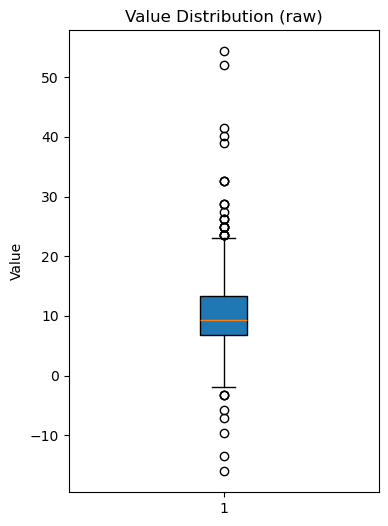

In [95]:
plt.figure(figsize=(4,6))
values_pm10_raw = dfposts_PM10_raw['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_raw, vert=True, patch_artist=True)
plt.title("Value Distribution (raw)")
plt.ylabel("Value")
plt.show()

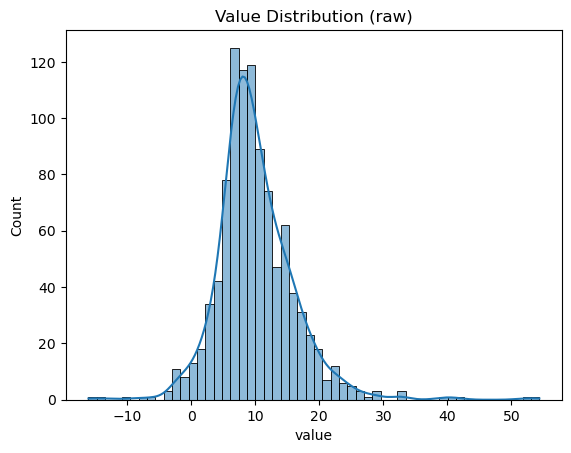

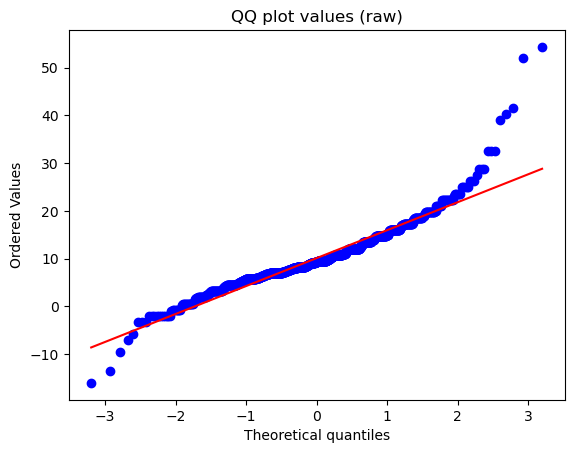

In [96]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_raw, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_raw, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [97]:
values_pm10_raw.skew()

np.float64(1.2931756015323785)

In [123]:
dfposts_PM10_clean= dfposts_PM10.copy()

dfposts_PM10_clean['value']= dfposts_PM10_clean['value'].mask(dfposts_PM10_clean['value'] < 0, np.nan) #replace every value smaller than 0 with NaN value

print((dfposts_PM10_clean['value'] < 0).sum())


0


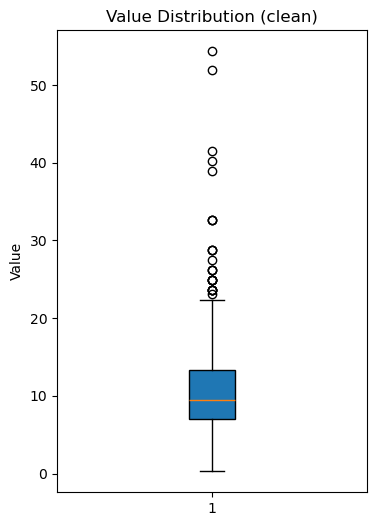

In [99]:
plt.figure(figsize=(4,6))
values_pm10_cleaned = dfposts_PM10_clean['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10_cleaned, vert=True, patch_artist=True)
plt.title("Value Distribution (clean)")
plt.ylabel("Value")
plt.show()

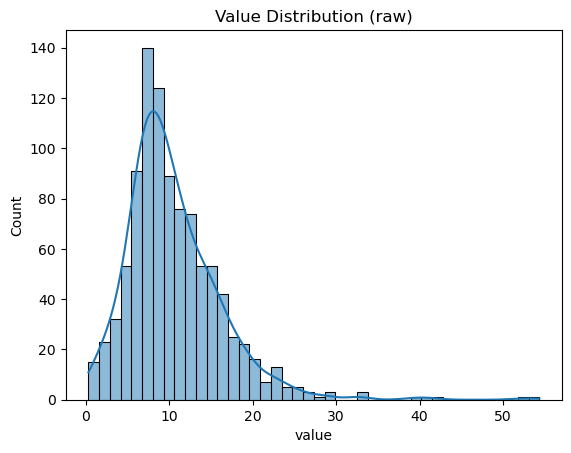

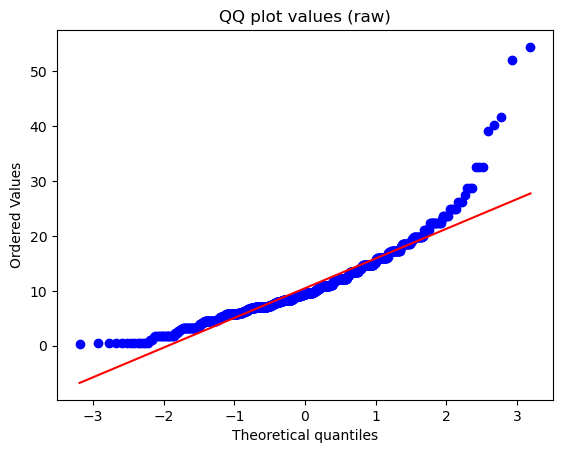

In [100]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10_cleaned, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(values_pm10_cleaned, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

In [101]:
print(values_pm10_cleaned)

0       9.55
1      24.91
2      14.60
3       8.95
4       4.70
       ...  
995    17.23
996    17.30
997     8.10
998    12.11
999    15.95
Name: value, Length: 973, dtype: float64


In [102]:
print(values_pm10_cleaned.skew())

1.8807744274013323


The data will become more skewed after removing the negative values. However this step is necessary because negative values are not possible (occur probably due to calibration errors and therefore could be seen as noise). Before standardizing the data, we will first transform the data by compressing the larger values (making it more normally distributed).
- However this transformation will again lead to negative values. In this case we will apply the following formulae to tackle this issue
    - log(x) + c
        - x is in this case the values from the PM10 variable but the cleaned version
        - c will be in this case the absolute value of the minimum measured value from 'values_pm10_cleaned' variable.

This will only change the scale, but it will not have an impact on the overall distribution of the log transformation data.

After transforming the data, the data will become less skewed (however still slightly negatively skewed), making the data set more normally distributed.



In [103]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
c = abs(values_pm10_cleaned.min())

shift = values + c
log_xpm10_clean = np.log(shift)  
print(log_xpm10_clean)


0      3.673258
1      2.310553
2      3.222071
3      3.793239
4      3.668677
         ...   
995    2.527327
996    1.821318
997    1.371181
998    2.595255
999    2.970414
Name: value, Length: 1000, dtype: float64


In [104]:
print(np.min(log_xpm10_clean))

-0.1053605156578264


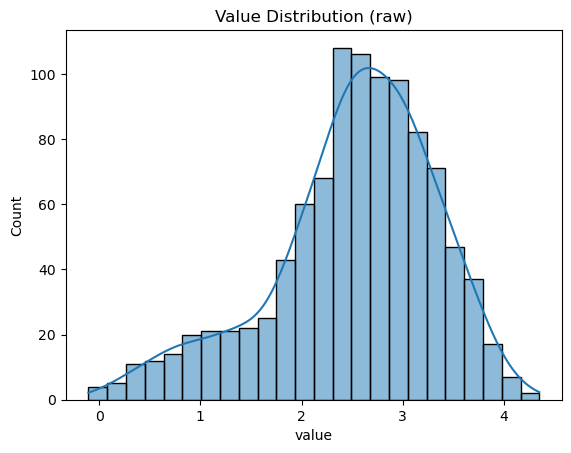

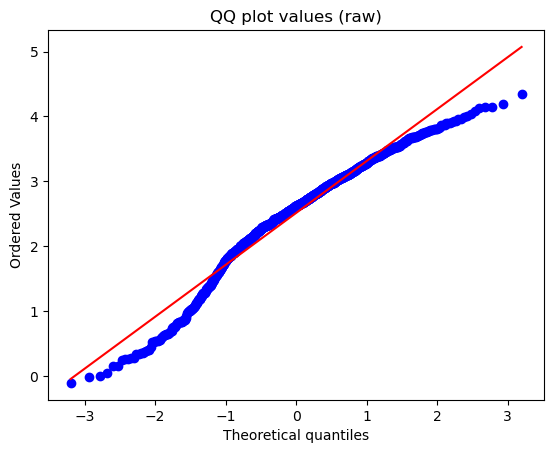

In [105]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(log_xpm10_clean, kde=True)
plt.title("Value Distribution (raw)")
plt.show()

stats.probplot(log_xpm10_clean, dist="norm", plot=plt)
plt.title("QQ plot values (raw)")
plt.show()

Removing the negative values could lead to a higher polution value, which you will see in the following cell:

In [106]:
dfposts_PM10_raw['RegioS']  = dfposts_PM10_raw['station_number'].map(PM10_pvencoding)
meanprovince_pm10_raw = dfposts_PM10_raw.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10_raw)


dfposts_PM10_clean['RegioS']  = dfposts_PM10_clean['station_number'].map(PM10_pvencoding)
meanprovince_pm10_clean = dfposts_PM10_clean.groupby('RegioS')['value'].mean().reset_index()

print("\n" , meanprovince_pm10_clean)


           RegioS      value
0         Drenthe   9.057692
1       Flevoland   7.001923
2       Friesland   4.134615
3      Gelderland  12.092581
4       Groningen   7.932692
5         Limburg  13.484091
6   Noord-Brabant  12.252073
7   Noord-Holland   8.785978
8      Overijssel   9.057692
9         Utrecht   9.038000
10        Zeeland   9.762500
11   Zuid-Holland  10.411618

            RegioS      value
0         Drenthe   9.057692
1       Flevoland   7.001923
2       Friesland   7.968824
3      Gelderland  12.092581
4       Groningen   8.704583
5         Limburg  13.625872
6   Noord-Brabant  12.771500
7   Noord-Holland   8.958918
8      Overijssel   9.976667
9         Utrecht   9.508710
10        Zeeland  10.096892
11   Zuid-Holland  10.609154


In [107]:
meanlocation_PM10_cleaned = dfposts_PM10_clean.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10_cleaned)

   station_number      value
0         NL01485   8.546154
1         NL01487   8.653846
2         NL01488   8.400000
3         NL01489  10.146154
4         NL01491   9.676923
..            ...        ...
75        NL50010  13.583333
76        NL50011  13.916667
77        NL50012  13.545455
78        NL54004   8.716364
79        NL54010   8.624167

[80 rows x 2 columns]


For us as data analysts it is useful to check where the negative values influenced the measured mean value (per station). The piece of code in the following cell will calculate the avg value (mean) of the cleaned and raw data set. It will eventually show the station numbers where the mean calculated from the raw dataset differs from the cleaned dataset. 

In [108]:
rawpm10 = meanlocation_PM10.groupby('station_number')['value'].mean()
cleanpm10 = meanlocation_PM10_cleaned.groupby('station_number')['value'].mean()


differencepm10_raw = np.setdiff1d(rawpm10, cleanpm10 ) #check values that differ from raw dataset
differencepm10_clean = np.setdiff1d(cleanpm10, rawpm10 ) #check values that differ from cleaned dataset
difference_mergepm10 = meanlocation_PM10.merge(meanlocation_PM10_cleaned, on='station_number') #
differencepm10= difference_mergepm10[difference_mergepm10['value_x'] != difference_mergepm10['value_y']]
print(differencepm10)

   station_number    value_x    value_y
14        NL10136  14.276154  15.630000
20        NL10240  11.716154  17.230000
23        NL10247   8.368462  10.403333
24        NL10248  11.923077  13.000000
30        NL10444   4.134615   5.128182
31        NL10445   7.222727   9.407778
32        NL10446   8.910000  10.248182
38        NL10636   7.088462   7.736667
41        NL10644   7.876154   9.433636
46        NL10818   8.860769  10.830000
47        NL10918   2.460769   6.510000
49        NL10934   5.808462   9.265556
50        NL10937   7.580769   9.200909


In [109]:
# This piece of code will create bar chart to visualize the averages of pm25 for each station using the raw data
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (raw)')
bar_pm10.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

# This piece of code will create bar chart to visualize the averages of pm25 for each station using the cleaned data
bar_pm10_cleaned = px.bar(meanlocation_PM10_cleaned, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station (clean)')
bar_pm10_cleaned.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
bar_pm10_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10_cleaned.show()

The following piece of code will show the impact of data cleaning on the average mean on a national level. According to these values, you can state that the negative values heavily impacted how the data will be perceived. Using the cleaned data will eventually help is reducing bias by helping to portray a more accurate representation of trends during the prediction phase.

In [110]:
print(meanprovince_pm10_raw)
print('Mean PM2.5 value raw:', meanprovince_pm25_raw['value'].mean(), '\n')

print(meanprovince_pm10_clean)
print('Mean PM2.5 value cleaned:', meanprovince_pm10_clean['value'].mean())

           RegioS      value
0         Drenthe   9.057692
1       Flevoland   7.001923
2       Friesland   4.134615
3      Gelderland  12.092581
4       Groningen   7.932692
5         Limburg  13.484091
6   Noord-Brabant  12.252073
7   Noord-Holland   8.785978
8      Overijssel   9.057692
9         Utrecht   9.038000
10        Zeeland   9.762500
11   Zuid-Holland  10.411618
Mean PM2.5 value raw: 3.822529319554747 

           RegioS      value
0         Drenthe   9.057692
1       Flevoland   7.001923
2       Friesland   7.968824
3      Gelderland  12.092581
4       Groningen   8.704583
5         Limburg  13.625872
6   Noord-Brabant  12.771500
7   Noord-Holland   8.958918
8      Overijssel   9.976667
9         Utrecht   9.508710
10        Zeeland  10.096892
11   Zuid-Holland  10.609154
Mean PM2.5 value cleaned: 10.031109568953015


In [111]:
import plotly.express as px
import plotly.graph_objects as go


#create bar chart that will visualize the provinces alongside their average measured value (using the raw dataset)
pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm10pv = meanprovince_pm10_raw[meanprovince_pm10_raw['RegioS'].isin(pv)]
bar_pm10pv = px.bar(meanprovince_pm10_raw, x='RegioS' , y= dfposts_PM10_raw.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region')
bar_pm10pv.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
bar_pm10pv.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv.show()


#create bar chart that will visualize the provinces alongside their average measured value (using the cleaned dataset)
pv_meanpm10_cleaned = meanprovince_pm10_clean[meanprovince_pm10_clean['RegioS'].isin(pv)]
bar_pm10pv_cleaned = px.bar(meanprovince_pm10_clean, x='RegioS' , y= dfposts_PM10_clean.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region (clean)')
bar_pm10pv_cleaned.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
bar_pm10pv_cleaned.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10pv_cleaned.show()

In [112]:

dfcorrelation_pm10 = pd.merge(meanprovince_pm10_clean, dfprovince, on='RegioS')

correlation_pm10 = dfcorrelation_pm10[['value', 'Sum']].corr()
corr_matrix_pm10 = go.Figure(data=go.Heatmap(
        z=correlation_pm10.values,
        x=correlation_pm10.columns,
        y=correlation_pm10.index,
        text=correlation_pm10.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm10.show()

Since the log_xpm10_cleaned values are stored as series instead of dataframe, we need to reshape the data (1d). Since we mainly want to use numerical data for the prediction part we scale them so that they will have the same impact on the clustering algorithms (which are sensitive to different data scales). Moreover, it is less sensitive to outliers (compared to minmax() scaling), helping us to reduce the impact of such outliers. 
- https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

The reason why we first transformed the data using log is to make the distribution less skewed by compressing the extreme values.

In [113]:
standardizeNO2 = StandardScaler().fit_transform(log_xpm10_clean.values.reshape(-1,1))

dfstandardizationNO2 = pd.Series(standardizeNO2.flatten())
print(dfstandardizationNO2)

0      1.426298
1     -0.250222
2      0.871208
3      1.573910
4      1.420662
         ...   
995    0.016473
996   -0.852122
997   -1.405921
998    0.100043
999    0.561598
Length: 1000, dtype: float64


###### https://stackoverflow.com/questions/70563254/map-of-a-country-with-plotly

In [115]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Air quality'),
    dcc.Dropdown(
        id="dropdown",
        options=["PM10", "PM2.5", "NO2"],
        value="PM10",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(typepolution):
    if typepolution=="PM10":
        return bar_pm10pv_cleaned
    elif typepolution=="PM2.5":
        return bar_avgpm25_clean
    if typepolution=="NO2":
        return bar_cleanno2


app.run(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run.

In [125]:
print(len(NO2_pvencoding))
print(len(PM25_pvencoding))
print(len(PM10_pvencoding))

81
63
82


In [130]:
pollutiontype = ['NO2', 'PM2.5', 'PM10']
station= [len(NO2_pvencoding), len(PM25_pvencoding), len(PM10_pvencoding)]
print(station)

dfstation = pd.DataFrame(list(zip(pollutiontype, station)))
print(dfstation)

piechart = px.pie(dfstation, names=pollutiontype, values=station)
piechart.show()

[81, 63, 82]
       0   1
0    NO2  81
1  PM2.5  63
2   PM10  82


In [138]:
meanprovince_pm10_raw[meanprovince_pm10_raw['RegioS'].isin(pv)].count()

RegioS    12
value     12
dtype: int64

In [142]:
from collections import Counter

In [ ]:
pv10_bar = Counter(PM10_pvencoding.values())
print(pv10_bar)
bar_pm10pv = px.bar( x= pv10_bar.keys(), y=pv10_bar.values() , title='Total number of stations per region')
bar_pm10pv.update_layout(yaxis_title='Total number of stations', xaxis_title= "Provinces", barmode='group') 
bar_pm10pv.show()

Counter({'Noord-Holland': 24, 'Zuid-Holland': 16, 'Limburg': 9, 'Noord-Brabant': 7, 'Zeeland': 6, 'Utrecht': 5, 'Gelderland': 5, 'Overijssel': 3, 'Friesland': 2, 'Flevoland': 2, 'Groningen': 2, 'Drenthe': 1})


In [ ]:
pv25_station_bar = Counter(PM25_pvencoding.values())
print(pv25_station_bar)
bar_pm25pv_station = px.bar( x= pv25_station_bar.keys(), y=pv25_station_bar.values() , title='Total number of stations per region (PM2.5)')
bar_pm25pv_station.update_layout(yaxis_title='Total number of stations', xaxis_title= "Provinces", barmode='group') 
bar_pm25pv_station.show()

Counter({'Noord-Holland': 19, 'Zuid-Holland': 16, 'Limburg': 8, 'Gelderland': 4, 'Noord-Brabant': 4, 'Zeeland': 3, 'Groningen': 3, 'Utrecht': 3, 'Friesland': 1, 'Flevoland': 1, 'Overijssel': 1})


In [151]:
NO2_station_bar = Counter(PM25_pvencoding.values())
print(NO2_station_bar)
bar_NO2pv_station = px.bar( x= NO2_station_bar.keys(), y=NO2_station_bar.values() , title='Total number of stations per region (NO2)')
bar_NO2pv_station.update_layout(yaxis_title='Total number of stations', xaxis_title= "Provinces", barmode='group') 
bar_NO2pv_station.show()

Counter({'Noord-Holland': 19, 'Zuid-Holland': 16, 'Limburg': 8, 'Gelderland': 4, 'Noord-Brabant': 4, 'Zeeland': 3, 'Groningen': 3, 'Utrecht': 3, 'Friesland': 1, 'Flevoland': 1, 'Overijssel': 1})


# To DO:
* Make visualization for the following:
  * Barchart for sum location number for each province
  * Check threshold values hourly for PM10, PM2.5 and NO2 (overrepresentation of certain provinces????)

